In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [36]:
data = pd.read_csv('Advertising.csv')
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [37]:
data.shape

(200, 5)

In [38]:
cond = data.isnull().sum()/len(data)>.15
x = data.isnull().sum()[cond]
x.index

Index([], dtype='object')

In [39]:
data.drop(x.index, axis = 1, inplace = True)

In [40]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [73]:
from sklearn.datasets import load_iris
iris = load_iris()
X = data.iloc[:,1:4]
y = data.iloc[:,-1:]

In [74]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

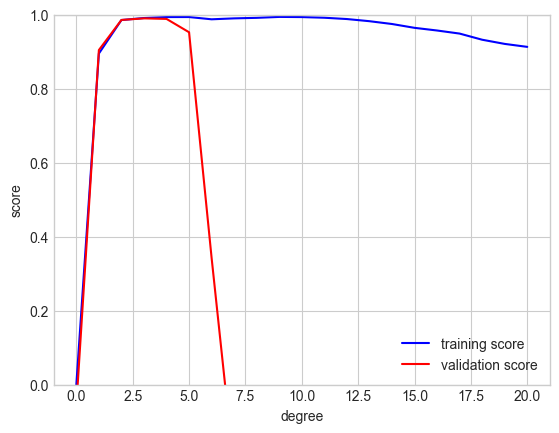

In [75]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(
    PolynomialRegression(), X, y,
    param_name='polynomialfeatures__degree',
    param_range=degree, cv=7)

plt.plot(degree, np.median(train_score, 1),
         color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1),
         color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

In [76]:
poly = PolynomialRegression(degree = 3)
poly

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [78]:
poly.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [79]:
y_pred = poly.predict(X_test)

In [80]:
from sklearn.metrics import r2_score
score = r2_score(y_pred, y_test)
print(score)

0.9916861258502222


In [81]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(poly, X, y, cv = 5)
scores.mean()

0.9885603012568124